# TEXT SUMMARY

In [1]:
import requests
import pandas as pd
import pandas as pd
import re
import numpy as np
import nltk
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from bs4 import BeautifulSoup as bs
URL = "https://news.detik.com/berita/d-6334129/5-fakta-baru-tragedi-kanjuruhan-6-tersangka-hingga-soal-gas-air-mata?single=1"
resp = requests.get(URL)
soup = bs(resp.text, "lxml")
elements = soup.find("div", attrs={"class":"detail__body-text itp_bodycontent"}).find_all('p')
dokumen = []
split_kalimat = [] 
for i,paragraf in enumerate(elements):
    dokumen.append(paragraf.text)
    # print(kalimat)
    for j,kalimat in enumerate(dokumen[i].split(".")):
        # print(len(kalimat))
        if len(kalimat) == 0:
            continue
        else:
            split_kalimat.append(kalimat)
def remove_stopwords(text):
    with open('stopwords.txt') as f:
        stopwords = f.readlines()
        stopwords = [x.strip() for x in stopwords]
    text = nltk.word_tokenize(text)
    text = [word for word in text if word not in stopwords]              
    return text

def stemming(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    result = [stemmer.stem(word) for word in text]
    return result

def preprocessing(kalimat):
    import re
    res_kata = []
    for j,kata in enumerate(kalimat.split(" ")):
        kata = kata.lower()
        kata = kata.replace(",", "")
        kata = kata.replace("\r\n","")
        kata = kata.replace("\"","")
        kata = ''.join(re.sub("[0-9]","",kata))
        if len(kata) > 0:
            res_kata.append(kata)
    # print(text)
    return res_kata

df = pd.DataFrame(split_kalimat,columns=['kata'])
df['kata'].apply(preprocessing).to_csv("preprocessing_summary.csv")
data = pd.read_csv("preprocessing_summary.csv")
data


    


,Unnamed: 0,kata
0,0,"['fakta-fakta', 'baru', 'terkait', 'tragedi', ..."
1,1,"['mulai', 'dari', 'ada', 'enam', 'tersangka', ..."
2,2,"['berikut', 'fakta', 'terbaru', 'tragedi', 'ka..."
3,3,"['kapolri', 'jenderal', 'listyo', 'sigit', 'pr..."
4,4,"['direktur', 'utama', 'pt', 'lib', 'akhmad', '..."
5,5,['advertisement']
6,6,"['scroll', 'to', 'resume', 'content']"
7,7,"['berdasarkan', 'gelar', 'dan', 'alat', 'bukti..."
8,8,"['lima', 'tersangka', 'lainnya', 'ialah', 'kab..."
9,9,"['kapolri', 'menyebut', 'pt', 'liga', 'indones..."


In [2]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer
dataTextPre = pd.read_csv('preprocessing_summary.csv')
vectorizer = CountVectorizer(min_df=1)
bag = vectorizer.fit_transform(dataTextPre['kata'])

In [3]:
matrik_vsm=bag.toarray()
matrik_vsm.shape

(55, 308)

In [4]:
matrik_vsm[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [5]:
a=vectorizer.get_feature_names_out()

In [6]:
dataTF =pd.DataFrame(data=matrik_vsm,index=list(range(1, len(matrik_vsm[:,1])+1, )),columns=[a])
dataTF

,achmadi,ada,adalah,adanya,advertisement,agar,ah,air,akan,akhmad,...,utara,verifikasi,versus,video,wahyu,waktu,waktunya,wib,yaitu,yang
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [7]:
import matplotlib.pyplot as plt
import networkx as nx
from nltk.probability import DictionaryConditionalProbDist
data = pd.read_csv("preprocessing_summary.csv")
G = nx.DiGraph()
G = nx.from_pandas_edgelist(data,edge_key='',edge_attr='kata',create_using=nx.Graph())
nx.draw(G)
plt.show()
# dataTF.

KeyError: 'source'

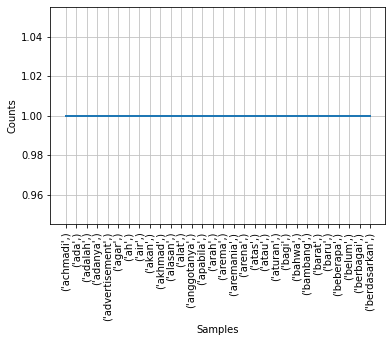

In [26]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

tokens = nltk.FreqDist(dataTF)
tokens
tokens.plot(30,cumulative=False)
plt.show()

In [27]:
#preprocessing
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet
from sklearn.decomposition import TruncatedSVD
#stop-words
stop_words=set(nltk.corpus.stopwords.words('indonesian'))
lsa_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=10, random_state=42)
vect=TfidfVectorizer(stop_words=stop_words,max_features=1000)
vect_text=vect.fit_transform(data['kata'])
lsa_top=lsa_model.fit_transform(vect_text)

c:\Users\M Nur Fauzan W\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


In [28]:
print(lsa_top)
# data_plot = pd.Series(lsa_top)
# data_plot.index = dataTF.columns
# data_plot.sort_values(ascending=False)
# data_plot.sort_values(ascending=False).plot.bar(figsize=(50, 20))


[[ 1.90471195e-01  2.31651332e-01 -1.96733343e-01  1.24494415e-01
   1.90138786e-01 -4.81033757e-02 -1.34941565e-01  3.15916586e-01
  -1.26998197e-01 -2.32898866e-01]
 [ 3.84844837e-01 -1.90797203e-01 -1.36226211e-01 -9.57888793e-02
  -1.47659467e-01 -1.54134918e-02  1.15159377e-01 -5.09558513e-03
  -2.16186916e-03  1.70980122e-01]
 [ 2.43889124e-01  2.12493220e-01 -2.92402381e-01  1.17452646e-01
   5.48821692e-01 -2.78758836e-01 -8.27067963e-02  1.50171260e-01
  -1.17825048e-01  9.22206799e-02]
 [ 2.86814641e-01  2.14860323e-01 -3.72691922e-01  1.50015377e-01
   5.82062049e-01 -2.50076974e-01  3.91166410e-02 -1.70836734e-02
  -1.06760052e-01  2.18188760e-01]
 [ 9.80323405e-02  1.52094462e-01 -1.32384617e-01  1.02752981e-01
   5.57032128e-02  1.54938730e-01  4.92420677e-01 -1.47120835e-01
   1.71422632e-01  2.73946042e-02]
 [ 1.80944139e-08  4.55674519e-07  8.74349235e-06  3.15128852e-05
  -2.91245444e-05 -2.08324428e-04  1.51844900e-03 -5.51510758e-04
   4.23184642e-03 -3.34173612e-03

In [29]:
label = pd.read_excel('/content/drive/MyDrive/webmining/TugasWebmining/twint/dataset.xlsx')
dj = pd.concat([dataTF.reset_index(), label["label"]], axis=1)
dj

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/webmining/TugasWebmining/twint/dataset.xlsx'

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dataTF,
    dataTF,
    test_size=0.3,
    random_state=0)

In [ ]:
y_train

,ada,air,arah,baru,bertanggung,dari,di,dianggap,enam,fakta,...,siapa,soal,stadion,terkait,tersangka,terungkap,timur,tragedi,tribun,yang
1,0,0,0,1,0,0,1,0,0,2,...,0,0,1,1,0,1,1,1,0,0


In [ ]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

ValueError: y should be a 1d array, got an array of shape (1, 32) instead.

In [ ]:
def preprocessing(text):
    #case folding
    text = text.lower()

    #remove non ASCII (emoticon, chinese word, .etc)
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\'," ").replace('\\f'," ").replace('\\r'," ")

    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')

    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())

    #replace weird characters
    text = text.replace('“', '"')
    text = text.replace('”', '"')
    text = text.replace('-', ' ')

    #tokenization and remove stopwords
    text = remove_stopwords(text)

    #remove punctuation    
    text = [''.join(c for c in s if c not in string.punctuation) for s in text]  

    #stemming
    text = stemming(text)

    #remove empty string
    text = list(filter(None, text))
    return text